#                                      Capstone Project - Telco Customer Churn Prediction

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,f1_score,precision_score, recall_score,classification_report,accuracy_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

# DATA PREPROCESSING

# Fetching the training and testing data from csv file

In [73]:
pwd

'C:\\Users\\Avinash\\Downloads\\Telco Customer Churn Prediction'

In [74]:
train_data=pd.read_csv("C:\\Users\\Avinash\\Downloads\\Telco Customer Churn Prediction\\Telecom churn train.csv")

In [75]:
train_data.shape

(667, 20)

In [76]:
test_data=pd.read_csv("C:\\Users\\Avinash\\Downloads\\Telco Customer Churn Prediction\\Telecom churn test.csv")

In [77]:
test_data.shape

(2666, 20)

# Merge traing and testing data to make single data frame

In [78]:
df=train_data.merge(test_data,how='outer')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# checking of combine shape after merging

In [79]:
df.shape

(3333, 20)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# Droping of catagorical variable

In [81]:
df=df.drop('State',axis=1)

# Replacing of catagorical records to integer value

In [82]:
df['International plan']=df['International plan'].replace('No',0)
df['International plan']=df['International plan'].replace('Yes',1)

In [83]:
df['International plan'].value_counts()

0    3010
1     323
Name: International plan, dtype: int64

In [84]:
df['Voice mail plan']=np.where(df['Voice mail plan']=='Yes',1 ,np.where(df['Voice mail plan']=='No',0,df['Voice mail plan']))

In [85]:
df['Voice mail plan'].value_counts()

0    2411
1     922
Name: Voice mail plan, dtype: int64

# Coverting Object data type to integer datatype

In [86]:
print(df['Voice mail plan'].dtype)

object


In [87]:
df['Voice mail plan']=df['Voice mail plan'].astype('int64')

# Dataframe after intial data pre-process

In [88]:
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# Box plot to check Outliers 

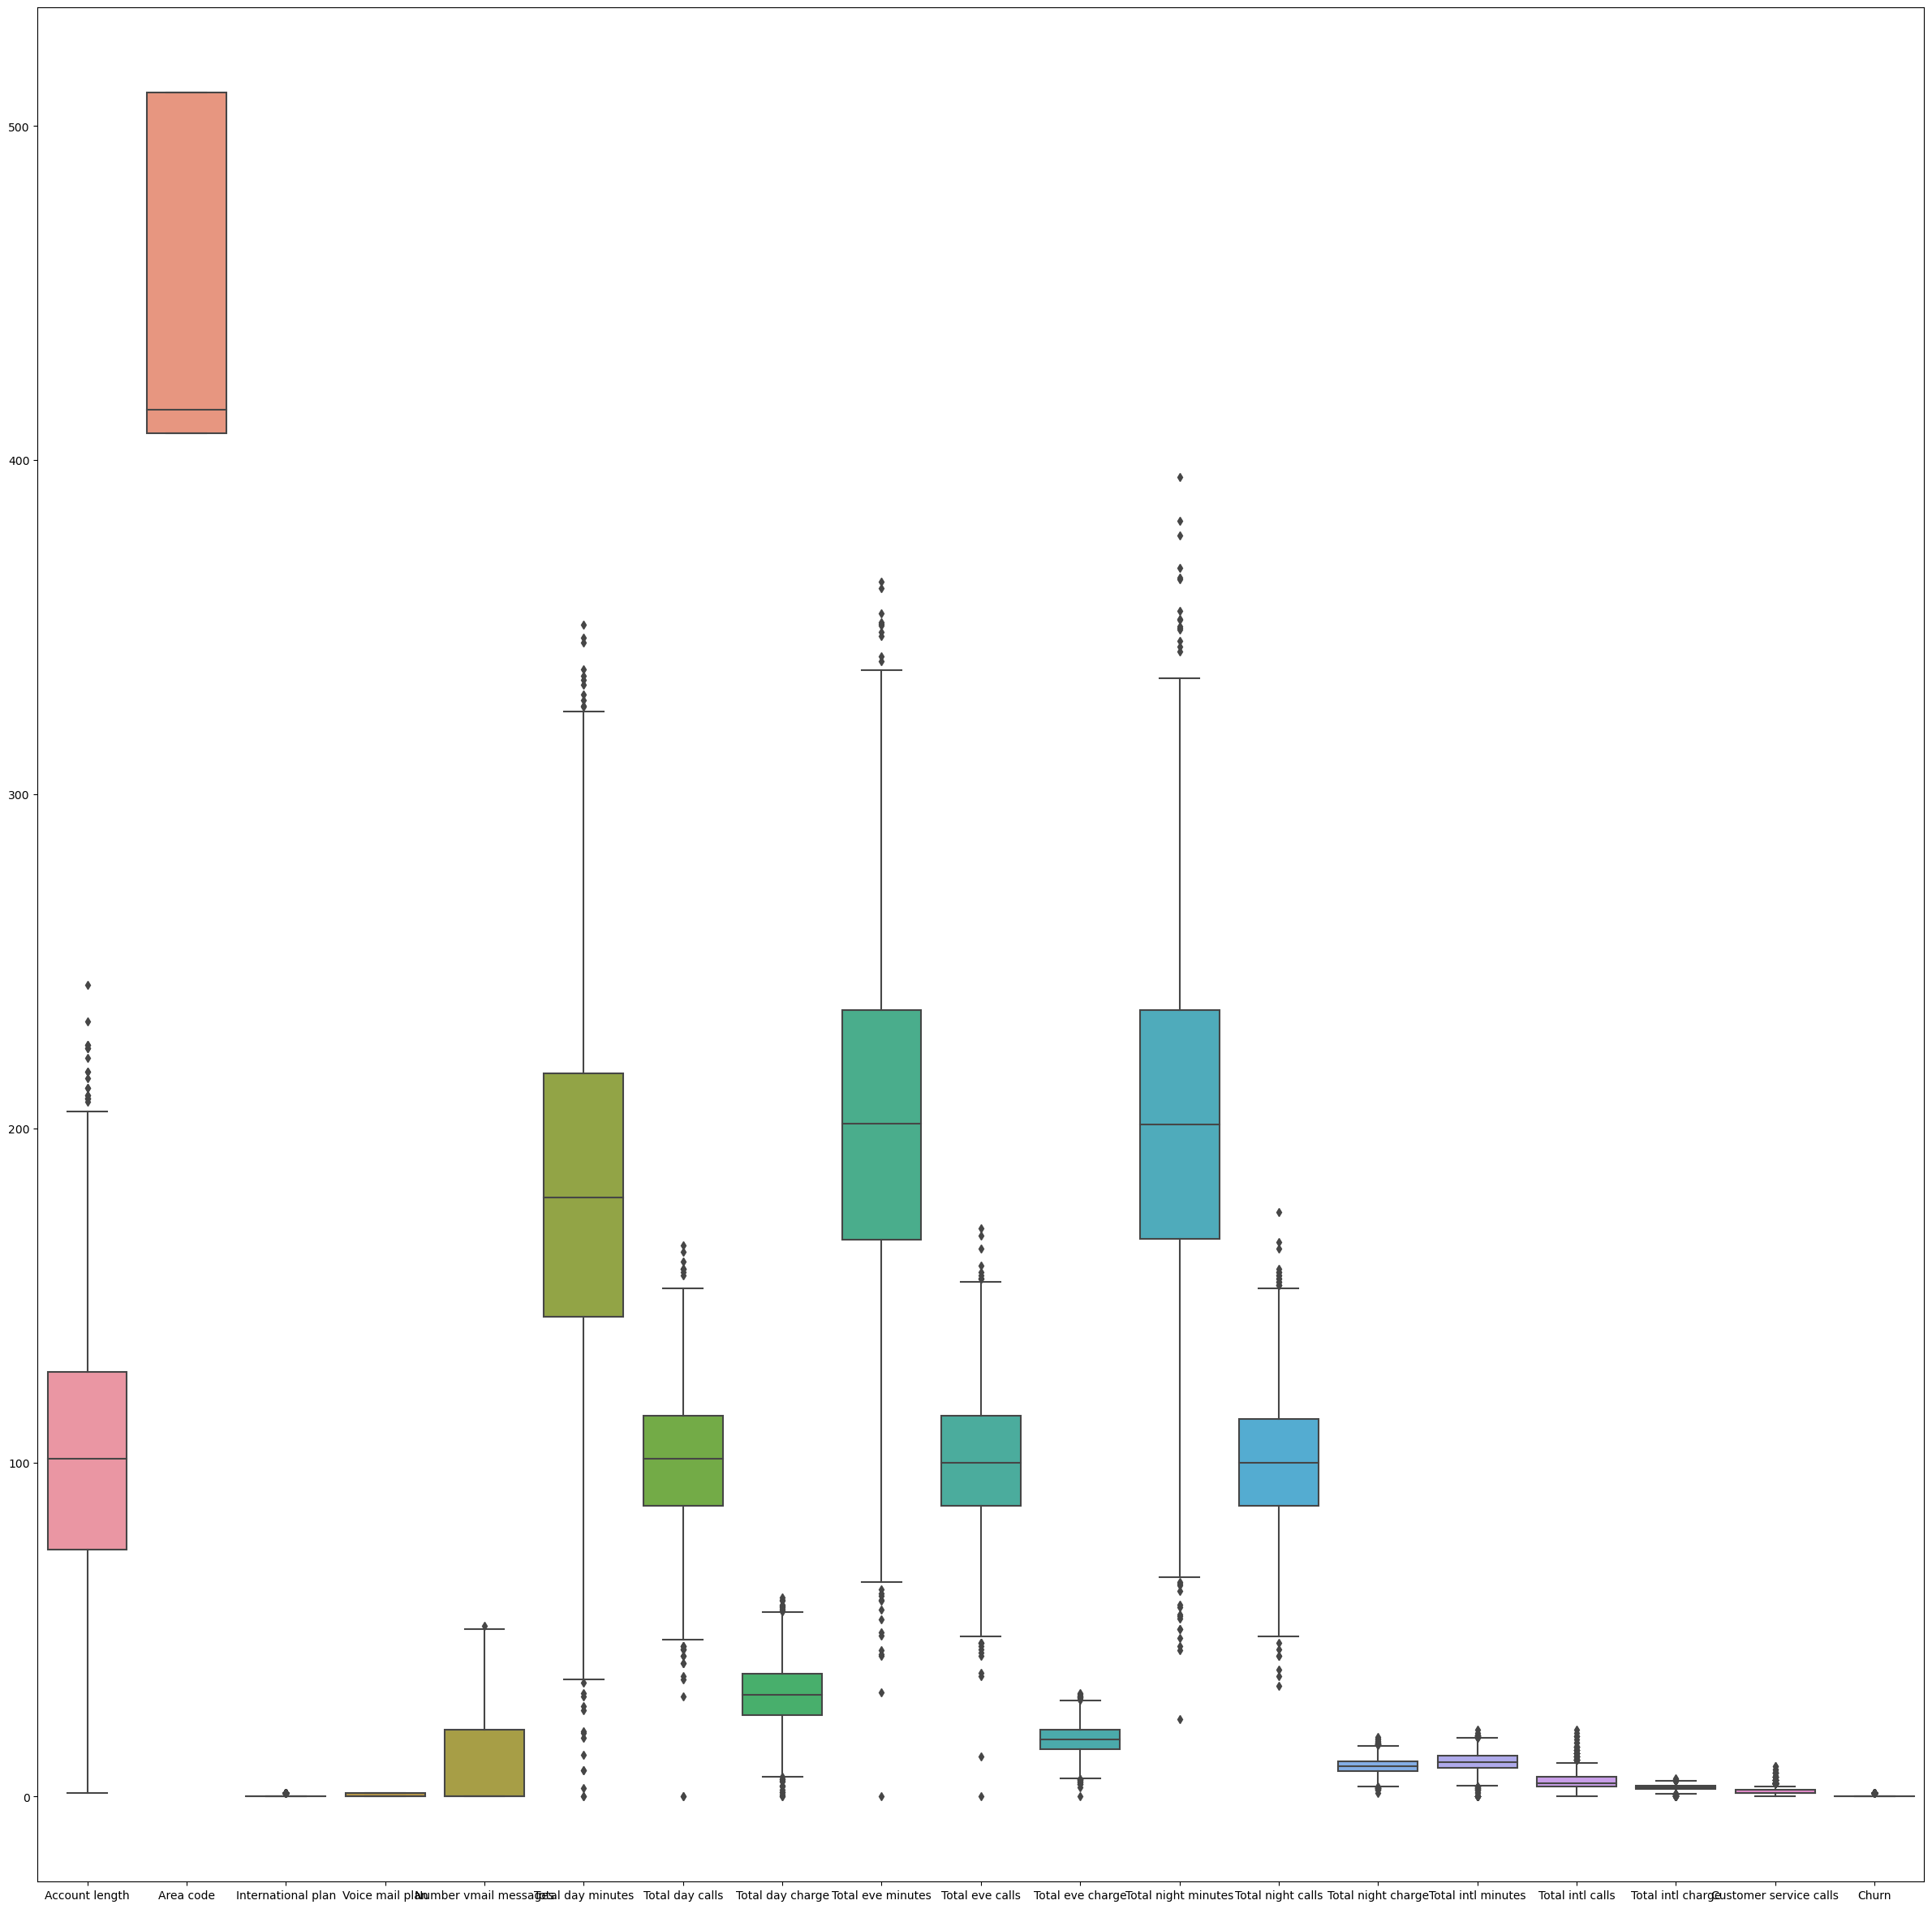

In [18]:
fig = plt.figure(figsize = (30,30))
sns.boxplot(data=df)
plt.show()

# seperating dependent and independent variable

In [19]:
#dependent variable
target=df['Churn'] 

In [20]:
#independent variable dataframe
df=df.iloc[:,:-1]

# Handling of outliers 

In [21]:
col=df.columns
for i in col:
    Q1=df[i].quantile(0.25)
    print('Q1----'+i+'-----'+ str(Q1))
    
    Q3=df[i].quantile(0.75)
    print('Q3----'+i+'-----'+ str(Q3))
    
    IQR = Q3 - Q1
    print('IQR----'+i+'-----'+ str(IQR))
    
    upper_limit=Q3+(1.5*IQR)
    print('upper_limit----'+i+'-----'+ str(upper_limit))
    
    lower_limit=Q1-(1.5*IQR)
    print('lower_limit----'+i+'-----'+ str(lower_limit))
    
    if(IQR!=0):
        df[i]=np.where(df[i]>=upper_limit,upper_limit , np.where(df[i]<=lower_limit,lower_limit,df[i]))
    print(end='\n')
    
    
    

Q1----Account length-----74.0
Q3----Account length-----127.0
IQR----Account length-----53.0
upper_limit----Account length-----206.5
lower_limit----Account length------5.5

Q1----Area code-----408.0
Q3----Area code-----510.0
IQR----Area code-----102.0
upper_limit----Area code-----663.0
lower_limit----Area code-----255.0

Q1----International plan-----0.0
Q3----International plan-----0.0
IQR----International plan-----0.0
upper_limit----International plan-----0.0
lower_limit----International plan-----0.0

Q1----Voice mail plan-----0.0
Q3----Voice mail plan-----1.0
IQR----Voice mail plan-----1.0
upper_limit----Voice mail plan-----2.5
lower_limit----Voice mail plan------1.5

Q1----Number vmail messages-----0.0
Q3----Number vmail messages-----20.0
IQR----Number vmail messages-----20.0
upper_limit----Number vmail messages-----50.0
lower_limit----Number vmail messages------30.0

Q1----Total day minutes-----143.7
Q3----Total day minutes-----216.4
IQR----Total day minutes-----72.70000000000002
up

In [22]:
df['Churn']=target
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117.0,408.0,0,0.0,0.0,184.50,97.0,31.37,338.35,80.0,28.76,215.8,90.0,9.71,8.7,4.0,2.35,1.0,False
1,65.0,415.0,0,0.0,0.0,129.10,137.0,21.95,228.50,83.0,19.42,208.8,111.0,9.40,12.7,6.0,3.43,3.5,True
2,161.0,415.0,0,0.0,0.0,325.45,67.0,55.33,317.80,97.0,27.01,160.6,128.0,7.23,5.4,9.0,1.46,3.5,True
3,111.0,415.0,0,0.0,0.0,110.40,103.0,18.77,137.30,102.0,11.67,189.6,105.0,8.53,7.7,6.0,2.08,2.0,False
4,49.0,510.0,0,0.0,0.0,119.30,117.0,20.28,215.10,109.0,18.28,178.7,90.0,8.04,11.1,1.0,3.00,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,79.0,415.0,0,0.0,0.0,134.70,98.0,22.90,189.70,68.0,16.12,221.4,128.0,9.96,11.8,5.0,3.19,2.0,False
3329,192.0,415.0,0,1.0,36.0,156.20,77.0,26.55,215.50,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False
3330,68.0,415.0,0,0.0,0.0,231.10,57.0,39.29,153.40,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False
3331,28.0,510.0,0,0.0,0.0,180.80,109.0,30.74,288.80,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False


# visualisation of dataframe after removing of outliers

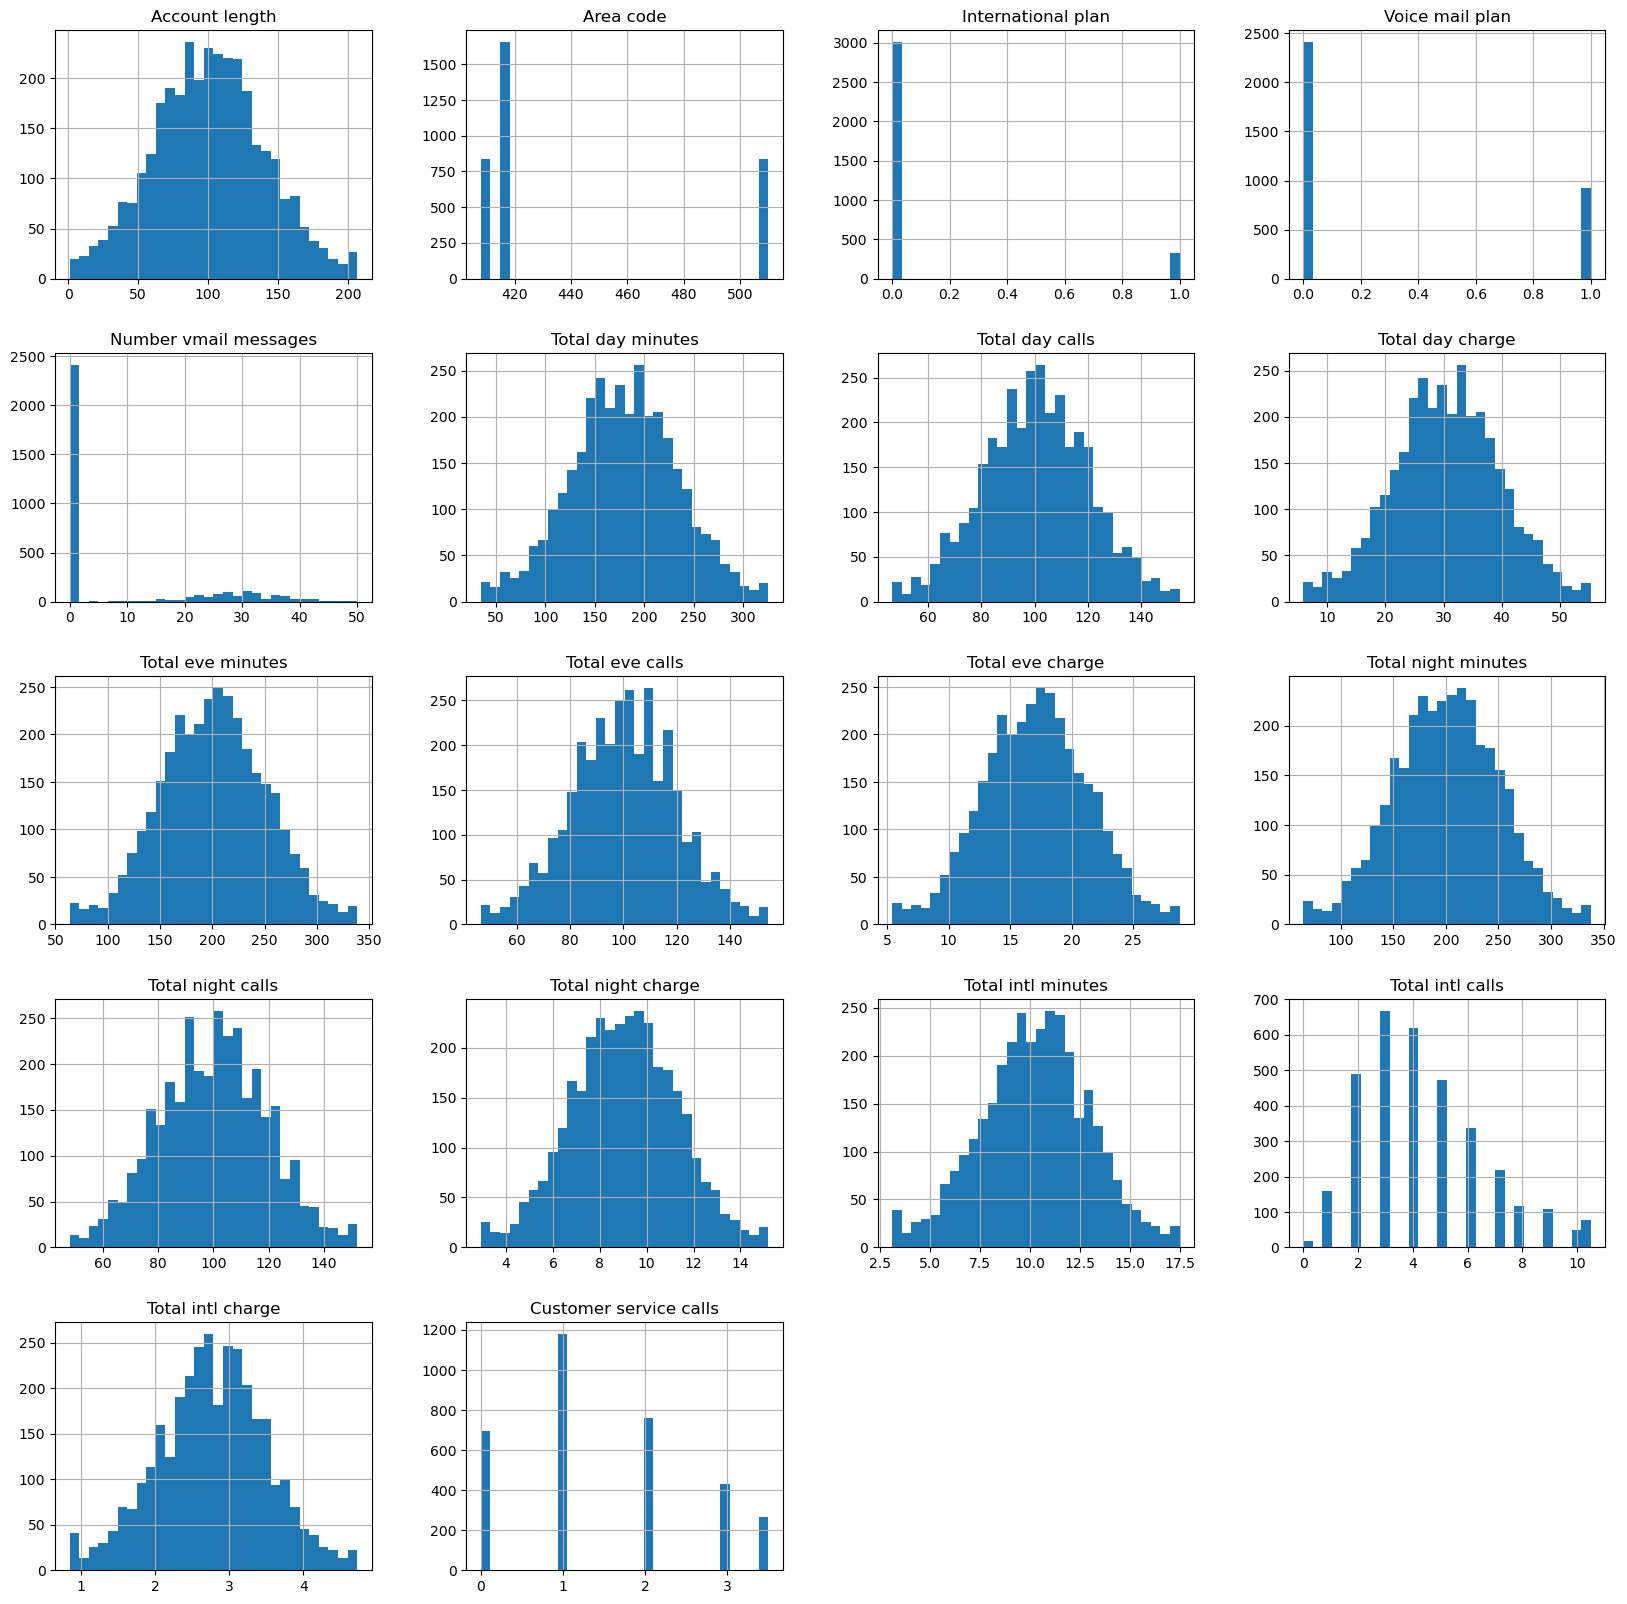

In [23]:
df.hist(bins=30, figsize=(20,20))
plt.show()

# checking the distribution and density

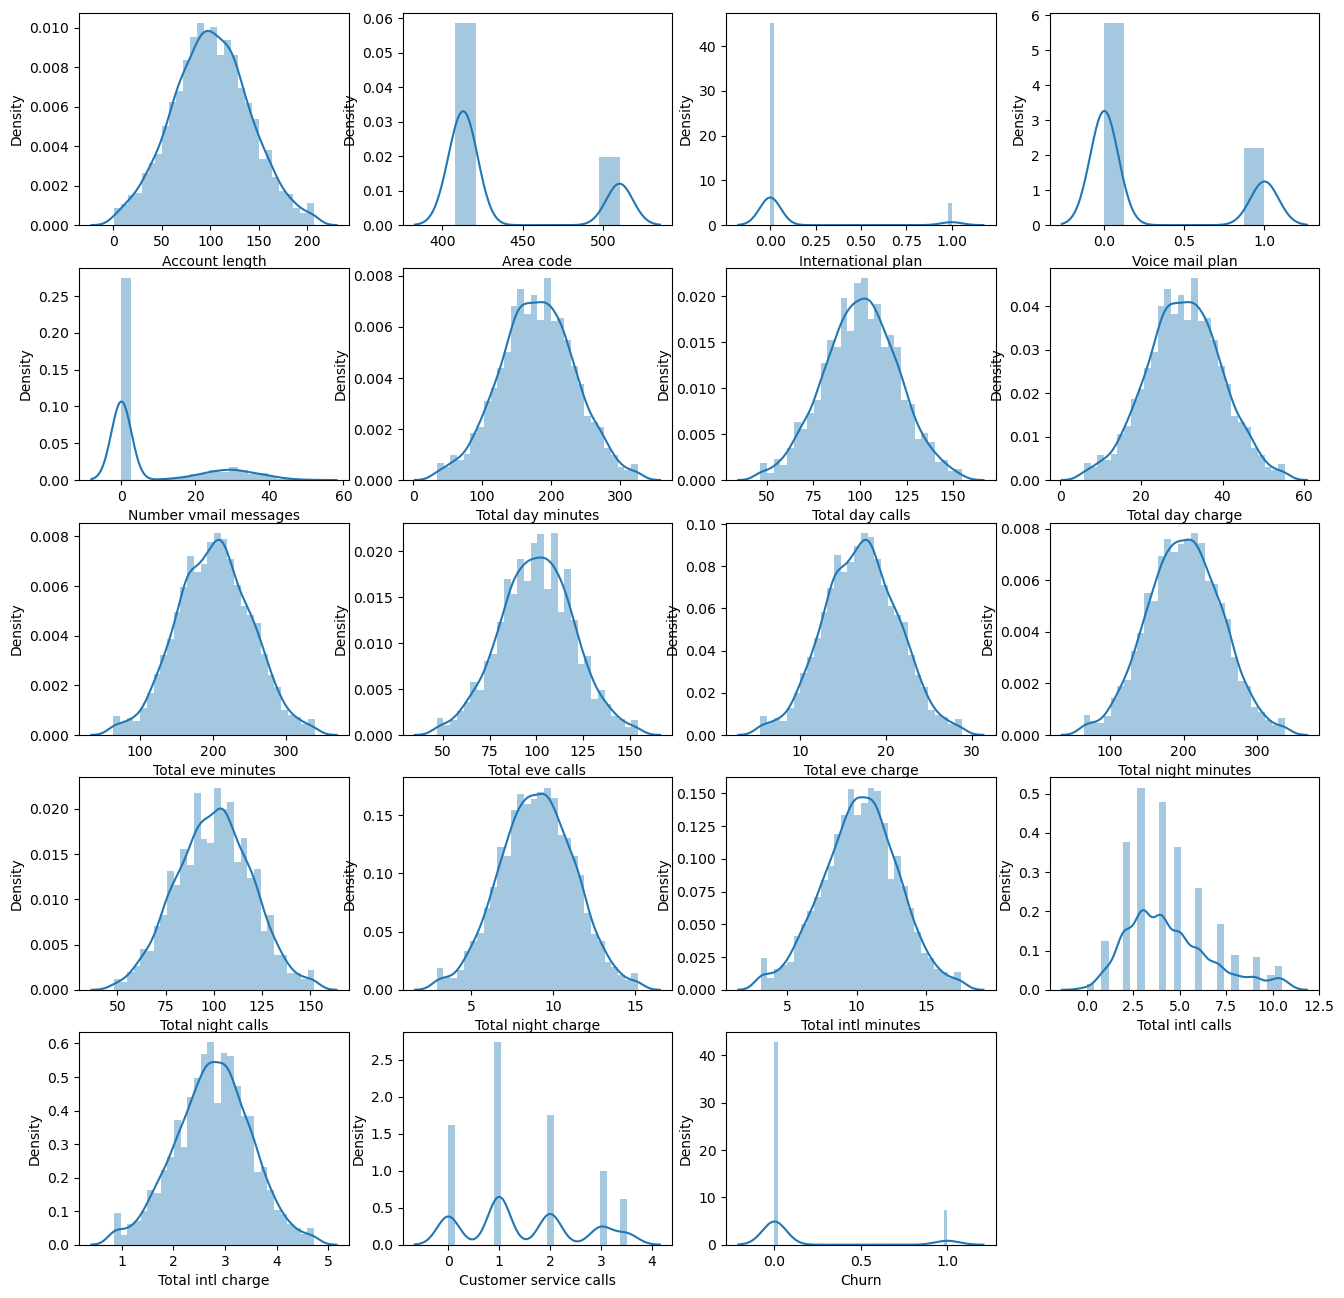

In [24]:
    
plt.figure(figsize=(16,16))
for i , col in enumerate (df) :
    plt.subplot(5,4,i+1)
    sns.distplot(x=df[col])
    plt.xlabel(col)

# Checking of value count of dependent vaiable and visiualize the  imbalance of data 

In [25]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

[Text(0, 0, '2850'), Text(0, 0, '483')]

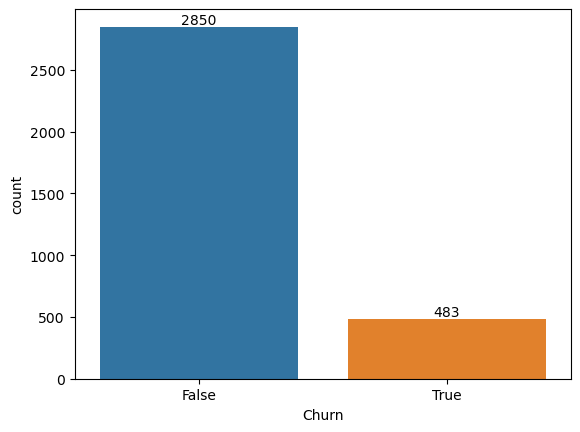

In [26]:
ax=sns.countplot(x = 'Churn' , data = df)
ax.bar_label(ax.containers[0])

# Handling of imbalance of Churn 
Chun is a imbalance records , With so few positive relative to negatives or false, 
the training model will spend most of its time on negative examples and not learn enough from positive or True ones.
so Here oversamlpling technique is using to deal with imbalance data set.

In [27]:
df_major=df[df.Churn==False]
df_minor=df[df.Churn==True]

In [28]:
print(df_minor.shape , df_major.shape)

(483, 19) (2850, 19)


In [29]:
minor_data_resampled=resample(df_minor ,replace= True , n_samples= 2850 ,random_state=42 )

In [30]:
print(minor_data_resampled.shape ,df_major.shape)

(2850, 19) (2850, 19)


In [31]:
df_sample = pd.concat([df_major, minor_data_resampled])
df_sample

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117.0,408.0,0,0.0,0.0,184.5,97.0,31.37,338.35,80.0,28.76,215.8,90.0,9.71,8.7,4.0,2.35,1.0,False
3,111.0,415.0,0,0.0,0.0,110.4,103.0,18.77,137.30,102.0,11.67,189.6,105.0,8.53,7.7,6.0,2.08,2.0,False
4,49.0,510.0,0,0.0,0.0,119.3,117.0,20.28,215.10,109.0,18.28,178.7,90.0,8.04,11.1,1.0,3.00,1.0,False
5,36.0,408.0,0,1.0,30.0,146.3,128.0,24.87,162.50,80.0,13.81,129.3,109.0,5.82,14.5,6.0,3.92,0.0,False
6,65.0,415.0,0,0.0,0.0,211.3,120.0,35.92,162.60,122.0,13.82,134.7,118.0,6.06,13.2,5.0,3.56,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,120.0,408.0,0,0.0,0.0,212.1,131.0,36.06,209.40,104.0,17.80,167.2,96.0,7.52,5.3,5.0,1.43,1.0,True
2445,98.0,415.0,0,0.0,0.0,217.2,121.0,36.92,303.40,73.0,25.79,197.1,71.0,8.87,12.4,2.0,3.35,0.0,True
2204,113.0,510.0,0,0.0,0.0,128.7,100.0,21.88,227.10,67.0,19.30,178.1,135.0,8.01,9.2,4.0,2.48,2.0,True
847,136.0,415.0,0,0.0,0.0,250.2,121.0,42.53,267.10,118.0,22.70,151.0,114.0,6.80,13.0,2.0,3.51,1.0,True


# checking correlation b/w different features

<AxesSubplot:>

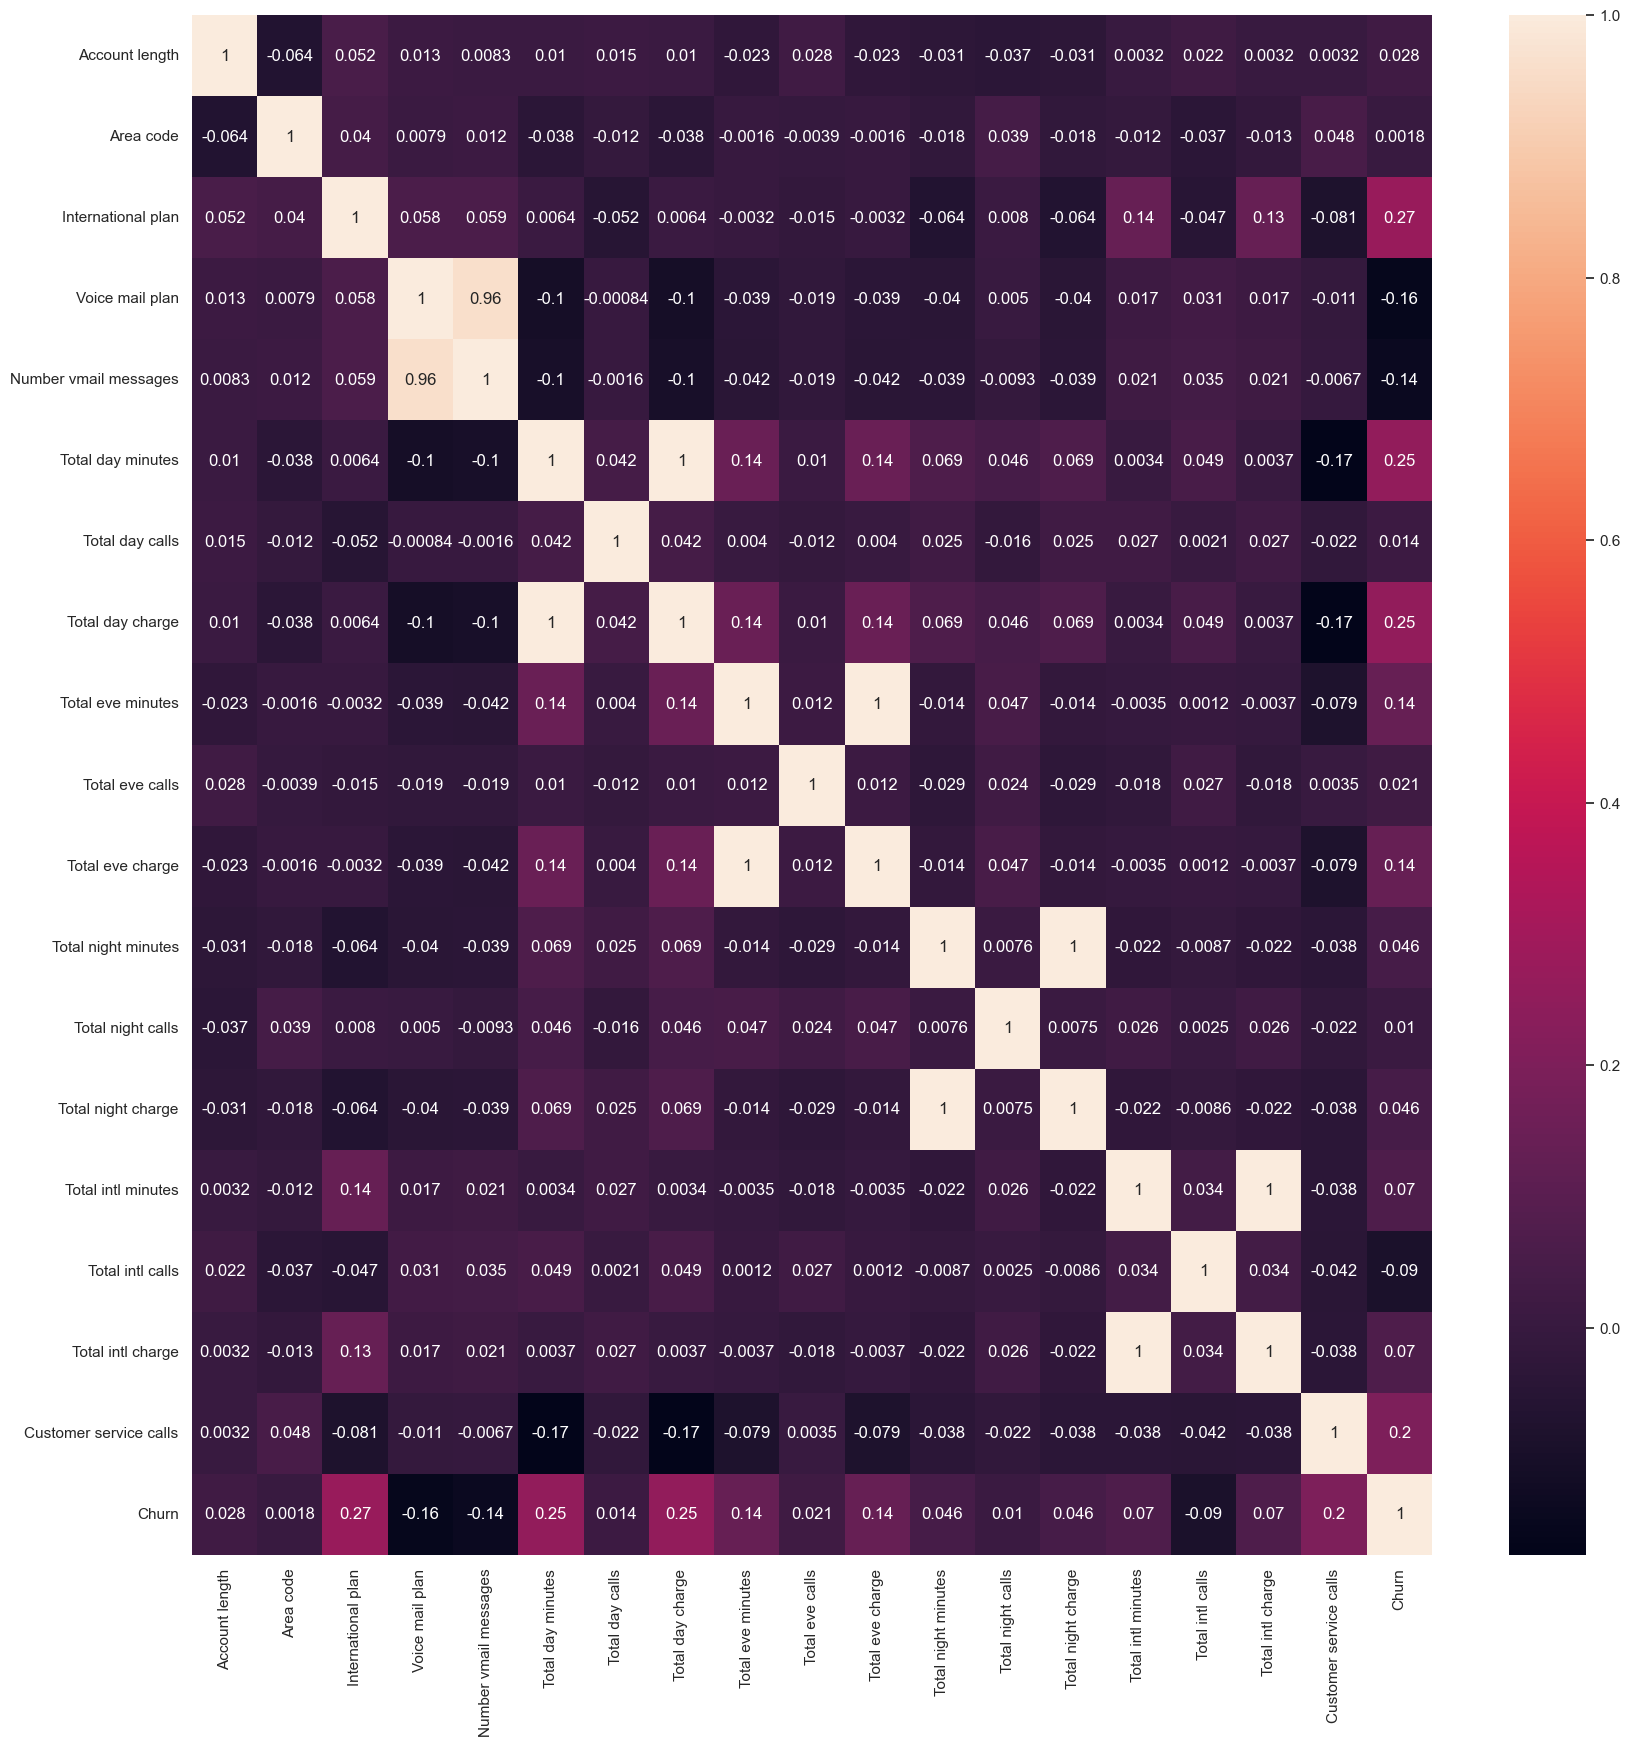

In [32]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df_sample.corr(), annot=True)

In [33]:
target=df_sample['Churn']

In [34]:
data=df_sample.drop('Churn',axis=1)
data.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')

# Converting data to numeric type to get Vif

In [35]:
data = data.apply(pd.to_numeric)

# checking the data info 

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 0 to 923
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          5700 non-null   float64
 1   Area code               5700 non-null   float64
 2   International plan      5700 non-null   int64  
 3   Voice mail plan         5700 non-null   float64
 4   Number vmail messages   5700 non-null   float64
 5   Total day minutes       5700 non-null   float64
 6   Total day calls         5700 non-null   float64
 7   Total day charge        5700 non-null   float64
 8   Total eve minutes       5700 non-null   float64
 9   Total eve calls         5700 non-null   float64
 10  Total eve charge        5700 non-null   float64
 11  Total night minutes     5700 non-null   float64
 12  Total night calls       5700 non-null   float64
 13  Total night charge      5700 non-null   float64
 14  Total intl minutes      5700 non-null   f

# Building Vif calculation method to check Multicollinearity 

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calcuation(X):
    VIF= pd.DataFrame()
    VIF['feature']  = X.columns
    VIF['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF['VIF']=VIF['VIF'] .round(1)
    return VIF

In [38]:
vif_calcuation(data)

,feature,VIF
0,Account length,7.5
1,Area code,61.4
2,International plan,1.3
3,Voice mail plan,16.8
4,Number vmail messages,16.6
5,Total day minutes,143563715.1
6,Total day calls,23.5
7,Total day charge,143565600.6
8,Total eve minutes,39237947.6
9,Total eve calls,23.9


# Droping of different variable having high Multicollinearity

In [39]:
data=data.drop('Total day minutes',axis=1)
data=data.drop('Total night minutes',axis=1)
data=data.drop('Total intl minutes',axis=1)
data=data.drop('Total eve minutes', axis=1)
vif_calcuation(data)

,feature,VIF
0,Account length,7.5
1,Area code,61.3
2,International plan,1.3
3,Voice mail plan,16.8
4,Number vmail messages,16.5
5,Total day calls,23.4
6,Total day charge,10.9
7,Total eve calls,23.9
8,Total eve charge,16.9
9,Total night calls,25.6


In [40]:
data=data.drop('Area code',axis=1)
vif_calcuation(data)

,feature,VIF
0,Account length,7.4
1,International plan,1.2
2,Voice mail plan,16.8
3,Number vmail messages,16.5
4,Total day calls,21.7
5,Total day charge,10.8
6,Total eve calls,21.9
7,Total eve charge,16.1
8,Total night calls,23.2
9,Total night charge,16.2


# Scaling the independent variables using min max scaler

In [41]:
data.describe()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,101.817544,0.167719,0.229123,6.820526,100.597281,32.484812,100.488596,17.519716,100.245965,9.104406,4.274123,2.800505,1.652807
std,39.160769,0.373650,0.420305,13.026916,20.270559,10.573209,19.925620,4.329060,19.537507,2.178839,2.295216,0.736955,1.221007
min,1.000000,0.000000,0.000000,0.000000,46.500000,5.890000,46.500000,5.400000,48.000000,2.915000,0.000000,0.845000,0.000000
25%,75.000000,0.000000,0.000000,0.000000,87.000000,24.800000,87.000000,14.440000,86.000000,7.600000,3.000000,2.320000,1.000000
50%,101.000000,0.000000,0.000000,0.000000,101.000000,32.150000,101.000000,17.600000,100.000000,9.140000,4.000000,2.810000,1.000000
75%,127.000000,0.000000,0.000000,0.000000,114.000000,40.312500,114.000000,20.482500,114.000000,10.600000,6.000000,3.290000,3.000000
max,206.500000,1.000000,1.000000,50.000000,154.500000,55.330000,154.500000,28.760000,152.000000,15.195000,10.500000,4.725000,3.500000


In [42]:
scale=MinMaxScaler()
scaled_data=scale.fit_transform(data)

In [43]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data

,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,0.564477,0.0,0.0,0.00,0.467593,0.515372,0.310185,1.000000,0.403846,0.553339,0.380952,0.387887,0.285714
1,0.535280,0.0,0.0,0.00,0.523148,0.260518,0.513889,0.268408,0.548077,0.457248,0.571429,0.318299,0.571429
2,0.233577,0.0,0.0,0.00,0.652778,0.291060,0.578704,0.551370,0.403846,0.417345,0.095238,0.555412,0.285714
3,0.170316,0.0,1.0,0.60,0.754630,0.383900,0.310185,0.360017,0.586538,0.236564,0.571429,0.792526,0.000000
4,0.311436,0.0,0.0,0.00,0.680556,0.607403,0.699074,0.360445,0.673077,0.256107,0.476190,0.699742,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.579075,0.0,0.0,0.00,0.782407,0.610235,0.532407,0.530822,0.461538,0.375000,0.476190,0.150773,0.285714
5696,0.472019,0.0,0.0,0.00,0.689815,0.627629,0.245370,0.872860,0.221154,0.484935,0.190476,0.645619,0.000000
5697,0.545012,0.0,0.0,0.00,0.495370,0.323422,0.189815,0.595034,0.836538,0.414902,0.380952,0.421392,0.571429
5698,0.656934,0.0,0.0,0.00,0.689815,0.741100,0.662037,0.740582,0.634615,0.316368,0.190476,0.686856,0.285714


# Independent variables still have correlation b/w features 
Applying PCA(Pricipal Component Analysis) for handling correlated features and for dimension reduction

In [44]:
n_component=10
pca=PCA(n_components=n_component ,random_state=None)
pca_data=pca.fit_transform(scaled_data)

plot graph b/w explaind variance ratio and pricipal component 

In [45]:
explain_var_ratio=pca.explained_variance_ratio_
cumulative_exp_var_ratio=np.cumsum(explain_var_ratio)

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

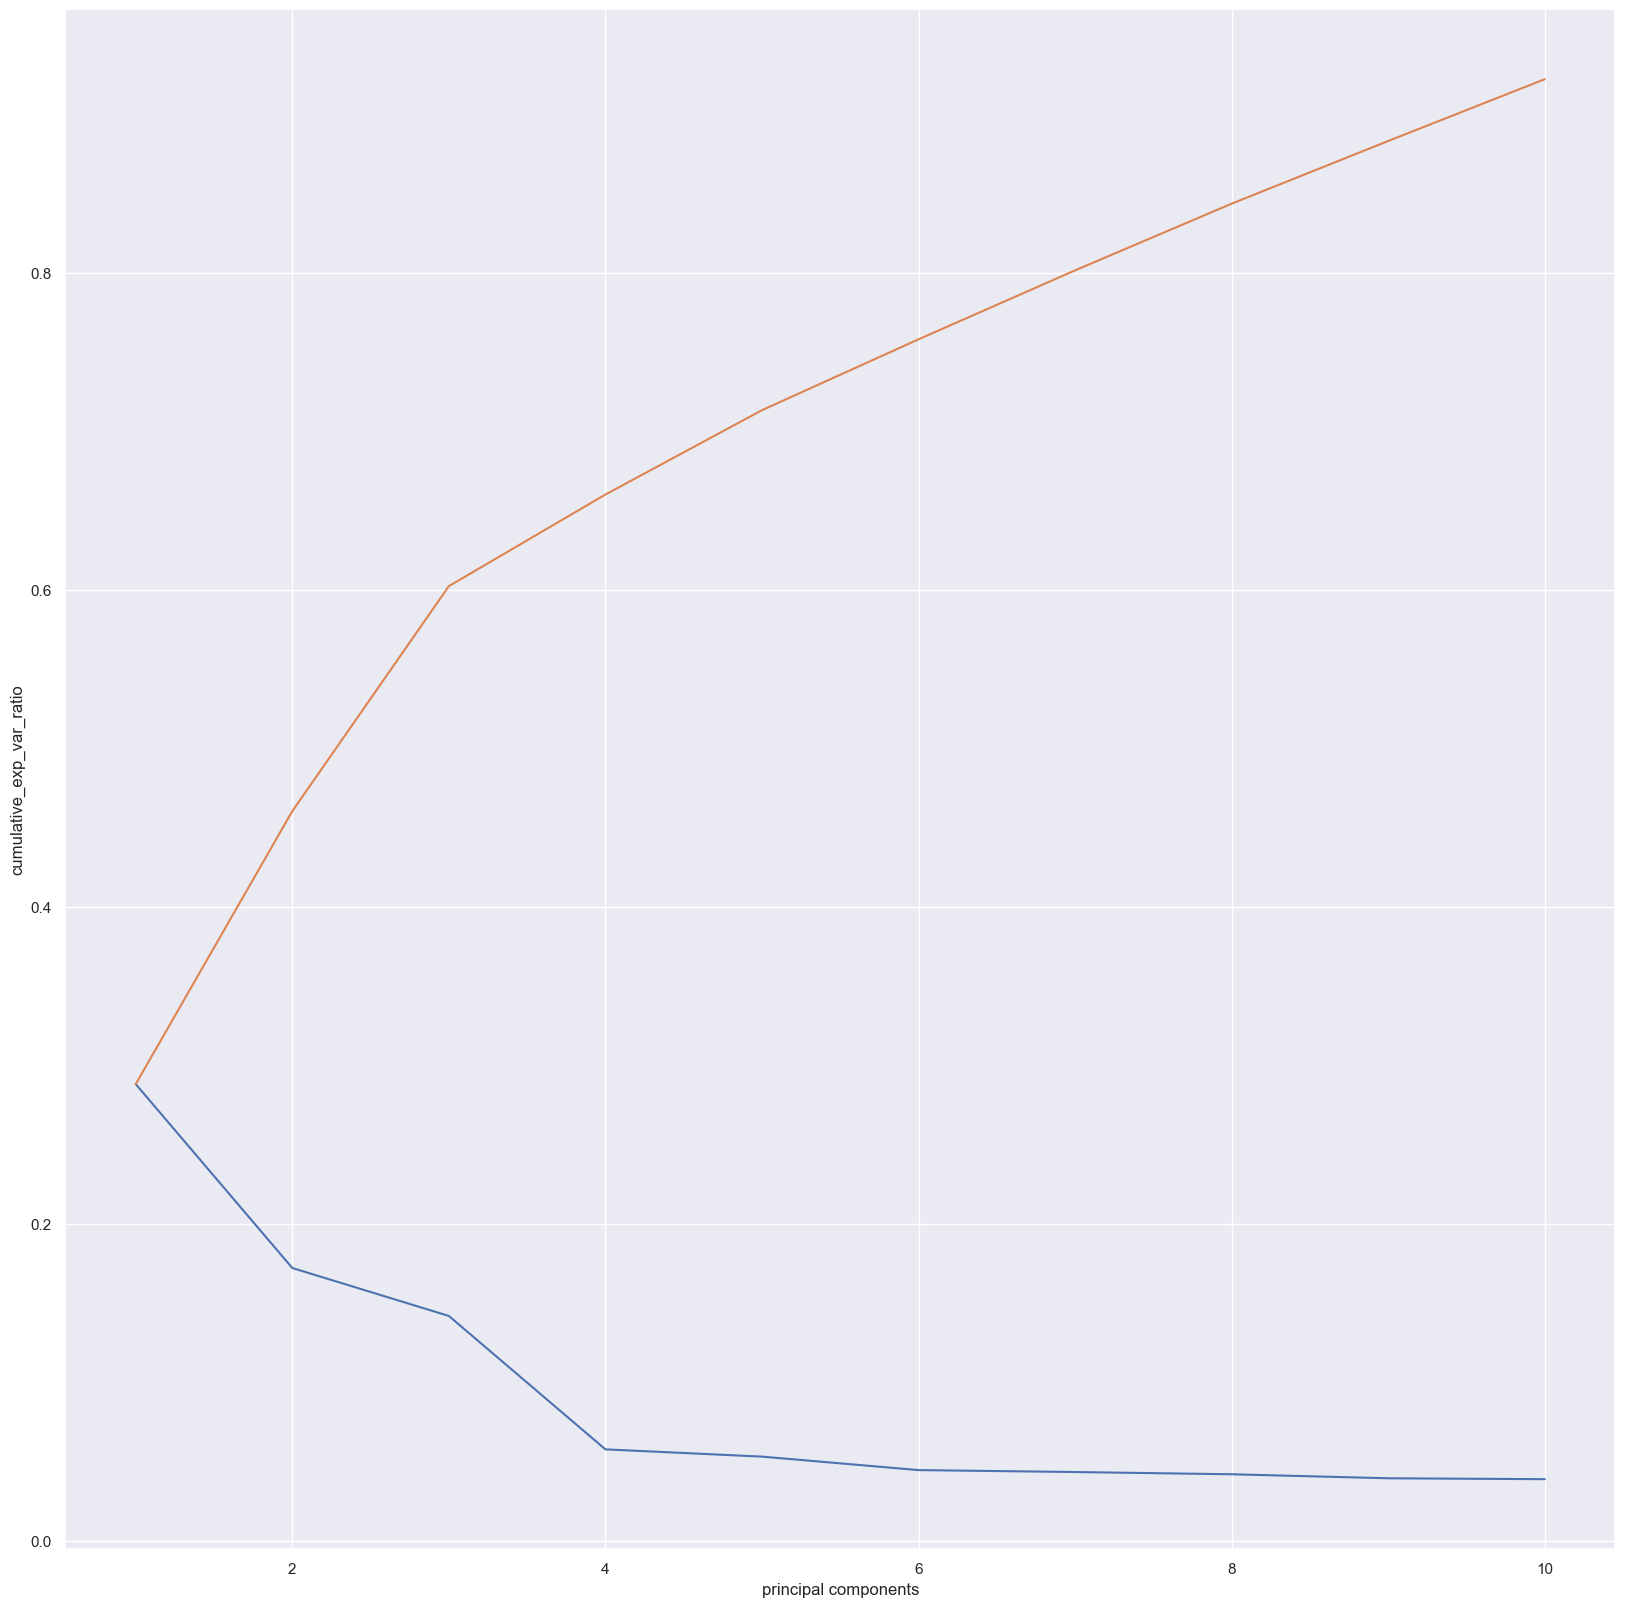

In [46]:
plt.plot(range(1,n_component+1),explain_var_ratio)
plt.plot(range(1,n_component+1),cumulative_exp_var_ratio)
plt.ylabel("cumulative_exp_var_ratio")
plt.xlabel("principal components")
plt.grid


# Getting more than 90 % of data in 10 PCA

In [47]:
pca_data=pd.DataFrame(pca_data,columns={'pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'})
pca_data

,pc5,pc4,pc1,pc10,pc7,pc3,pc6,pc8,pc2,pc9
0,-0.287705,-0.036027,-0.250659,-0.035658,-0.110557,0.028336,-0.074640,-0.109537,0.114383,0.204381
1,-0.263504,-0.209110,0.068732,-0.010337,0.362589,0.023213,-0.083894,-0.026329,-0.127917,-0.180862
2,-0.271898,-0.056264,-0.172875,-0.414638,0.083174,-0.112350,0.141923,0.041662,-0.182554,0.232069
3,0.903890,-0.030646,-0.501349,0.002752,0.246982,-0.260804,0.433308,0.058447,-0.065318,0.090875
4,-0.284899,-0.277927,0.271146,0.152881,-0.019281,-0.152344,0.161377,0.260556,-0.171199,0.062046
...,...,...,...,...,...,...,...,...,...,...
5695,-0.285107,-0.067243,-0.252015,0.038948,-0.006921,0.233564,-0.090707,-0.076146,-0.302897,-0.023015
5696,-0.285331,0.113147,-0.495004,-0.196949,-0.165282,0.137182,0.283199,-0.101003,0.121784,0.337411
5697,-0.270625,-0.175834,0.053519,-0.105273,0.072840,-0.180522,0.020288,0.084699,0.101487,-0.209526
5698,-0.292310,0.006253,-0.249379,-0.045318,-0.279426,0.115662,0.059623,0.408449,-0.017825,0.157685


# Dividing the data into trainging and testing 

In [48]:
x_train,x_test,y_train,y_test=train_test_split(pca_data,target,test_size=0.30 ,random_state=42)

# Building different different Meaching Learning Modeles

In [61]:
# to increase output scroll height 
from IPython.display import display, HTML
display(HTML("""
<style>
    div.output_scroll {height: 60em; }
</style>
"""))

Training accuracy score of  LogisticRegression 0.7338345864661654
Testing accuracy score of  LogisticRegression 0.7309941520467836
Precision of  LogisticRegression 0.716295427901524
Recall of LogisticRegression 0.7370325693606755
F1 Score of  LogisticRegression 0.7265160523186682
classifcation_report of LogisticRegression
              precision    recall  f1-score   support

       False       0.75      0.73      0.74       881
        True       0.72      0.74      0.73       829

    accuracy                           0.73      1710
   macro avg       0.73      0.73      0.73      1710
weighted avg       0.73      0.73      0.73      1710

Confusion Matrix of LogisticRegression


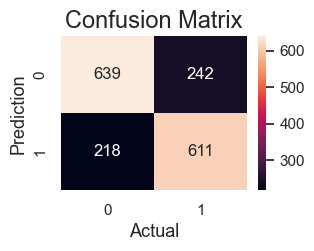



Training accuracy score of  KNeighborsClassifier 0.9155388471177945
Testing accuracy score of  KNeighborsClassifier 0.8695906432748538
Precision of  KNeighborsClassifier 0.819620253164557
Recall of KNeighborsClassifier 0.9372738238841978
F1 Score of  KNeighborsClassifier 0.8745075970737196
classifcation_report of KNeighborsClassifier
              precision    recall  f1-score   support

       False       0.93      0.81      0.86       881
        True       0.82      0.94      0.87       829

    accuracy                           0.87      1710
   macro avg       0.88      0.87      0.87      1710
weighted avg       0.88      0.87      0.87      1710

Confusion Matrix of KNeighborsClassifier


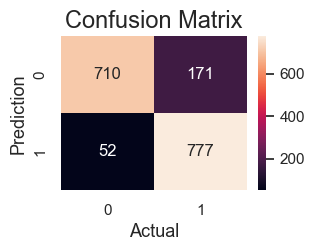



Training accuracy score of  SVC 0.8766917293233083
Testing accuracy score of  SVC 0.8725146198830409
Precision of  SVC 0.8623962040332147
Recall of SVC 0.8769601930036188
F1 Score of  SVC 0.8696172248803828
classifcation_report of SVC
              precision    recall  f1-score   support

       False       0.88      0.87      0.88       881
        True       0.86      0.88      0.87       829

    accuracy                           0.87      1710
   macro avg       0.87      0.87      0.87      1710
weighted avg       0.87      0.87      0.87      1710

Confusion Matrix of SVC


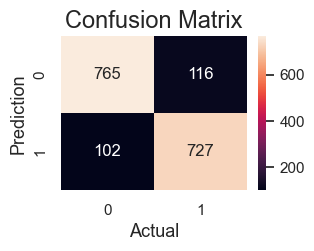



Training accuracy score of  GaussianNB 0.7714285714285715
Testing accuracy score of  GaussianNB 0.7672514619883041
Precision of  GaussianNB 0.7717528373266078
Recall of GaussianNB 0.738238841978287
F1 Score of  GaussianNB 0.75462392108508
classifcation_report of GaussianNB
              precision    recall  f1-score   support

       False       0.76      0.79      0.78       881
        True       0.77      0.74      0.75       829

    accuracy                           0.77      1710
   macro avg       0.77      0.77      0.77      1710
weighted avg       0.77      0.77      0.77      1710

Confusion Matrix of GaussianNB


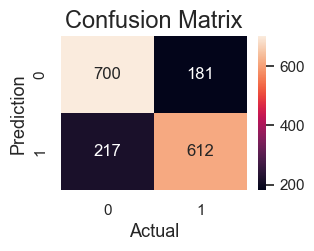



Training accuracy score of  DecisionTreeClassifier 1.0
Testing accuracy score of  DecisionTreeClassifier 0.9485380116959065
Precision of  DecisionTreeClassifier 0.9102990033222591
Recall of DecisionTreeClassifier 0.991556091676719
F1 Score of  DecisionTreeClassifier 0.9491916859122401
classifcation_report of DecisionTreeClassifier
              precision    recall  f1-score   support

       False       0.99      0.91      0.95       881
        True       0.91      0.99      0.95       829

    accuracy                           0.95      1710
   macro avg       0.95      0.95      0.95      1710
weighted avg       0.95      0.95      0.95      1710

Confusion Matrix of DecisionTreeClassifier


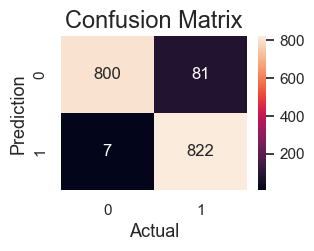



Training accuracy score of  RandomForestClassifier 1.0
Testing accuracy score of  RandomForestClassifier 0.9713450292397661
Precision of  RandomForestClassifier 0.9452054794520548
Recall of RandomForestClassifier 0.9987937273823885
F1 Score of  RandomForestClassifier 0.9712609970674487
classifcation_report of RandomForestClassifier
              precision    recall  f1-score   support

       False       1.00      0.95      0.97       881
        True       0.95      1.00      0.97       829

    accuracy                           0.97      1710
   macro avg       0.97      0.97      0.97      1710
weighted avg       0.97      0.97      0.97      1710

Confusion Matrix of RandomForestClassifier


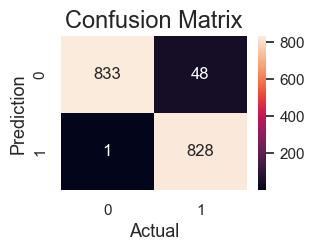



Training accuracy score of  AdaBoostClassifier 0.8644110275689223
Testing accuracy score of  AdaBoostClassifier 0.8415204678362573
Precision of  AdaBoostClassifier 0.831353919239905
Recall of AdaBoostClassifier 0.8443908323281062
F1 Score of  AdaBoostClassifier 0.8378216636744463
classifcation_report of AdaBoostClassifier
              precision    recall  f1-score   support

       False       0.85      0.84      0.85       881
        True       0.83      0.84      0.84       829

    accuracy                           0.84      1710
   macro avg       0.84      0.84      0.84      1710
weighted avg       0.84      0.84      0.84      1710

Confusion Matrix of AdaBoostClassifier


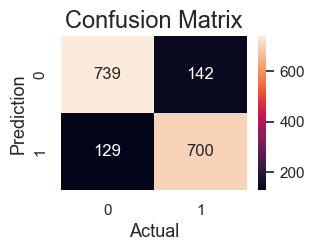



Training accuracy score of  BaggingClassifier 0.9989974937343359
Testing accuracy score of  BaggingClassifier 0.9713450292397661
Precision of  BaggingClassifier 0.9462242562929062
Recall of BaggingClassifier 0.9975874547647768
F1 Score of  BaggingClassifier 0.9712272460364063
classifcation_report of BaggingClassifier
              precision    recall  f1-score   support

       False       1.00      0.95      0.97       881
        True       0.95      1.00      0.97       829

    accuracy                           0.97      1710
   macro avg       0.97      0.97      0.97      1710
weighted avg       0.97      0.97      0.97      1710

Confusion Matrix of BaggingClassifier


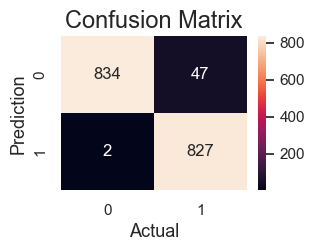



Training accuracy score of  GradientBoostingClassifier 0.9263157894736842
Testing accuracy score of  GradientBoostingClassifier 0.9029239766081871
Precision of  GradientBoostingClassifier 0.8895417156286721
Recall of GradientBoostingClassifier 0.9131483715319663
F1 Score of  GradientBoostingClassifier 0.9011904761904762
classifcation_report of GradientBoostingClassifier
              precision    recall  f1-score   support

       False       0.92      0.89      0.90       881
        True       0.89      0.91      0.90       829

    accuracy                           0.90      1710
   macro avg       0.90      0.90      0.90      1710
weighted avg       0.90      0.90      0.90      1710

Confusion Matrix of GradientBoostingClassifier


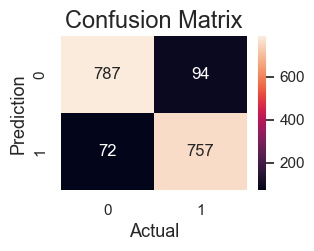



Training accuracy score of  VotingClassifier 0.9278195488721804
Testing accuracy score of  VotingClassifier 0.9087719298245615
Precision of  VotingClassifier 0.9159456118665018
Recall of VotingClassifier 0.893848009650181
F1 Score of  VotingClassifier 0.9047619047619048
classifcation_report of VotingClassifier
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       881
        True       0.92      0.89      0.90       829

    accuracy                           0.91      1710
   macro avg       0.91      0.91      0.91      1710
weighted avg       0.91      0.91      0.91      1710

Confusion Matrix of VotingClassifier


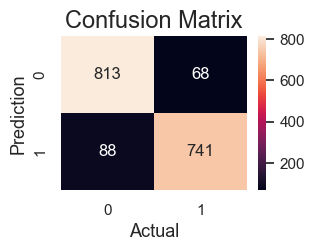

In [55]:
logistic_model=LogisticRegression()
KNN_model=KNeighborsClassifier()
svc_model=SVC()
gaussianNB_model=GaussianNB()
desicion_tree_clf=DecisionTreeClassifier()
random_forest_clf=RandomForestClassifier()
adaBoost_clf=AdaBoostClassifier()
bagging_clf=BaggingClassifier()
gradientBoost_clf=GradientBoostingClassifier()


voting_clf_hard=VotingClassifier(estimators=[('lr',logistic_model),('knn',KNN_model),('svc',svc_model),('gaussian_model',gaussianNB_model),
                                       ('desicion_tree',desicion_tree_clf),('rand_forest',random_forest_clf)],voting='hard')


model_list=[logistic_model,KNN_model,svc_model,gaussianNB_model,desicion_tree_clf,
            random_forest_clf,adaBoost_clf,bagging_clf,gradientBoost_clf,voting_clf_hard]


for model in model_list:
    model.fit(x_train,y_train)
    
    print('Training accuracy score of ', model.__class__.__name__, model.score(x_train,y_train))
    
    y_pred=model.predict(x_test)
    
    print('Testing accuracy score of ', model.__class__.__name__,accuracy_score(y_test,y_pred))
    
    precision = precision_score(y_test,y_pred)
    print("Precision of ",model.__class__.__name__, precision)
    
    recall = recall_score(y_test,y_pred)
    print("Recall of",model.__class__.__name__ , recall)
    
    f1 = f1_score(y_test,y_pred)
    print("F1 Score of ",model.__class__.__name__ , f1)
    
    classifcation_report=classification_report(y_test,y_pred)
    print("classifcation_report of" , model.__class__.__name__ )
    print(classifcation_report)
    
    conf_matrix = confusion_matrix(y_test,y_pred)
    print("Confusion Matrix of" , model.__class__.__name__)
    plt.figure(figsize=(3,2))
    sns.heatmap(conf_matrix, annot=True,fmt='g')
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
        
    print('\n')


# HYPERPARAMETER OPTIMIZATION WITH GRIDSERCHCV

In [214]:
grid_parameter={'n_estimators':[200] , 
                'max_depth':[1,2,3,4,5,6,7,8,9,10],
                'criterion':['gini','entropy'],
               'max_features':list(range(0,10)),}


In [215]:
random_forest_clf=RandomForestClassifier()

In [157]:
model=GridSearchCV(estimator=random_forest_clf,param_grid=grid_parameter,cv=5,n_jobs=1,verbose=2,scoring='accuracy')
model.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END criterion=gini, max_depth=1, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=1, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=1, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=1, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=1, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=2, max_features=8, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=2, max_features=8, n_estimators=200; total time=   1.6s
[CV] END criterion=gini, max_depth=2, max_features=8, n_estimators=200; total time=   1.8s
[CV] END criterion=gini, max_depth=2, max_features=8, n_estimators=200; total time=   1.9s
[CV] END criterion=gini, max_depth=2, max_features=8, n_estimators=200; total time=   1.9s
[CV] END criterion=gini, max_depth=2, max_features=9, n_estimators=200; total time=   2.0s
[CV] END criterion=gini, max_depth=2, max_features=9, n_estimators=200; total time=   2.0s
[CV] END criterion=gini, max_depth=2, max_features=9, n_estimators=200; total time=   2.0s
[CV] END criterion=gini, max_depth=2, max_features=9, n_estimators=200; total time=   1.5s
[CV] END criterion=gini, max_depth=2, max_features=9, n_estimators=200; total time=   1.7s
[CV] END criterion=gini, max_depth=3, max_features=0, n_estimators=200; total time=   0.0s

[CV] END criterion=gini, max_depth=4, max_features=6, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=4, max_features=6, n_estimators=200; total time=   2.2s
[CV] END criterion=gini, max_depth=4, max_features=6, n_estimators=200; total time=   1.7s
[CV] END criterion=gini, max_depth=4, max_features=6, n_estimators=200; total time=   2.1s
[CV] END criterion=gini, max_depth=4, max_features=7, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=4, max_features=7, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=4, max_features=7, n_estimators=200; total time=   3.6s
[CV] END criterion=gini, max_depth=4, max_features=7, n_estimators=200; total time=   2.2s
[CV] END criterion=gini, max_depth=4, max_features=7, n_estimators=200; total time=   2.5s
[CV] END criterion=gini, max_depth=4, max_features=8, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=4, max_features=8, n_estimators=200; total time=   3.7s

[CV] END criterion=gini, max_depth=6, max_features=4, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=4, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=4, n_estimators=200; total time=   1.8s
[CV] END criterion=gini, max_depth=6, max_features=5, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=6, max_features=5, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=6, max_features=5, n_estimators=200; total time=   2.6s
[CV] END criterion=gini, max_depth=6, max_features=5, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=6, max_features=5, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=6, max_features=6, n_estimators=200; total time=   2.6s
[CV] END criterion=gini, max_depth=6, max_features=6, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=6, max_features=6, n_estimators=200; total time=   3.2s

[CV] END criterion=gini, max_depth=8, max_features=2, n_estimators=200; total time=   1.7s
[CV] END criterion=gini, max_depth=8, max_features=2, n_estimators=200; total time=   1.6s
[CV] END criterion=gini, max_depth=8, max_features=3, n_estimators=200; total time=   2.2s
[CV] END criterion=gini, max_depth=8, max_features=3, n_estimators=200; total time=   2.2s
[CV] END criterion=gini, max_depth=8, max_features=3, n_estimators=200; total time=   1.6s
[CV] END criterion=gini, max_depth=8, max_features=3, n_estimators=200; total time=   1.9s
[CV] END criterion=gini, max_depth=8, max_features=3, n_estimators=200; total time=   2.1s
[CV] END criterion=gini, max_depth=8, max_features=4, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=8, max_features=4, n_estimators=200; total time=   2.8s
[CV] END criterion=gini, max_depth=8, max_features=4, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=8, max_features=4, n_estimators=200; total time=   2.5s

[CV] END criterion=gini, max_depth=10, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=1, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=1, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=1, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=1, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=1, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=2, n_estimators=200; total time=   1.9s
[CV] END criterion=gini, max_depth=10, max_features=2, n_estimators=200; total time=   1.9s
[CV] END criterion=gini, max_depth=10, max_features=2, n_estimators=200; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=2, n_estimators=200; total t

[CV] END criterion=entropy, max_depth=1, max_features=8, n_estimators=200; total time=   0.7s
[CV] END criterion=entropy, max_depth=1, max_features=8, n_estimators=200; total time=   0.8s
[CV] END criterion=entropy, max_depth=1, max_features=8, n_estimators=200; total time=   0.7s
[CV] END criterion=entropy, max_depth=1, max_features=9, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=1, max_features=9, n_estimators=200; total time=   0.8s
[CV] END criterion=entropy, max_depth=1, max_features=9, n_estimators=200; total time=   0.7s
[CV] END criterion=entropy, max_depth=1, max_features=9, n_estimators=200; total time=   0.8s
[CV] END criterion=entropy, max_depth=1, max_features=9, n_estimators=200; total time=   0.8s
[CV] END criterion=entropy, max_depth=2, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=0, n_e

[CV] END criterion=entropy, max_depth=3, max_features=6, n_estimators=200; total time=   1.3s
[CV] END criterion=entropy, max_depth=3, max_features=6, n_estimators=200; total time=   1.2s
[CV] END criterion=entropy, max_depth=3, max_features=6, n_estimators=200; total time=   1.3s
[CV] END criterion=entropy, max_depth=3, max_features=6, n_estimators=200; total time=   1.2s
[CV] END criterion=entropy, max_depth=3, max_features=6, n_estimators=200; total time=   1.3s
[CV] END criterion=entropy, max_depth=3, max_features=7, n_estimators=200; total time=   1.5s
[CV] END criterion=entropy, max_depth=3, max_features=7, n_estimators=200; total time=   1.4s
[CV] END criterion=entropy, max_depth=3, max_features=7, n_estimators=200; total time=   1.5s
[CV] END criterion=entropy, max_depth=3, max_features=7, n_estimators=200; total time=   1.4s
[CV] END criterion=entropy, max_depth=3, max_features=7, n_estimators=200; total time=   1.4s
[CV] END criterion=entropy, max_depth=3, max_features=8, n_e

[CV] END criterion=entropy, max_depth=5, max_features=3, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=5, max_features=3, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=5, max_features=4, n_estimators=200; total time=   1.4s
[CV] END criterion=entropy, max_depth=5, max_features=4, n_estimators=200; total time=   1.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, n_estimators=200; total time=   1.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, n_estimators=200; total time=   1.4s
[CV] END criterion=entropy, max_depth=5, max_features=4, n_estimators=200; total time=   1.4s
[CV] END criterion=entropy, max_depth=5, max_features=5, n_estimators=200; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=5, n_estimators=200; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=5, n_estimators=200; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=5, n_e

[CV] END criterion=entropy, max_depth=7, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=entropy, max_depth=7, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=entropy, max_depth=7, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=entropy, max_depth=7, max_features=1, n_estimators=200; total time=   0.6s
[CV] END criterion=entropy, max_depth=7, max_features=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=2, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=7, max_features=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=3, n_estimators=200; total time=   1.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, n_e

[CV] END criterion=entropy, max_depth=8, max_features=8, n_estimators=200; total time=   3.1s
[CV] END criterion=entropy, max_depth=8, max_features=9, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=8, max_features=9, n_estimators=200; total time=   3.8s
[CV] END criterion=entropy, max_depth=8, max_features=9, n_estimators=200; total time=   3.7s
[CV] END criterion=entropy, max_depth=8, max_features=9, n_estimators=200; total time=   3.8s
[CV] END criterion=entropy, max_depth=8, max_features=9, n_estimators=200; total time=   3.5s
[CV] END criterion=entropy, max_depth=9, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, max_features=0, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, max_features=0, n_e

[CV] END criterion=entropy, max_depth=10, max_features=6, n_estimators=200; total time=   2.8s
[CV] END criterion=entropy, max_depth=10, max_features=6, n_estimators=200; total time=   2.9s
[CV] END criterion=entropy, max_depth=10, max_features=6, n_estimators=200; total time=   2.8s
[CV] END criterion=entropy, max_depth=10, max_features=6, n_estimators=200; total time=   2.9s
[CV] END criterion=entropy, max_depth=10, max_features=7, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=10, max_features=7, n_estimators=200; total time=   3.1s
[CV] END criterion=entropy, max_depth=10, max_features=7, n_estimators=200; total time=   3.1s
[CV] END criterion=entropy, max_depth=10, max_features=7, n_estimators=200; total time=   3.0s
[CV] END criterion=entropy, max_depth=10, max_features=7, n_estimators=200; total time=   3.2s
[CV] END criterion=entropy, max_depth=10, max_features=8, n_estimators=200; total time=   3.7s
[CV] END criterion=entropy, max_depth=10, max_feat

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=2)

# print the best score and estimator parameters

In [158]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.9390977443609021
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Result

After applying different Machine Learning technique I come on conclusion that we can choose Random forestClassifer 
OR Bagging classifier model because their precision , accuracy , Recall is more as compared to other meachine Learning models.


-------------------Scores For The RandomForestClassifier--------------------

Training accuracy score of  RandomForestClassifier 1.0


Testing accuracy score of  RandomForestClassifier 0.9713450292397661


Precision of  RandomForestClassifier 0.9452054794520548


Recall of RandomForestClassifier 0.9987937273823885


F1 Score of  RandomForestClassifier 0.9712609970674487



-------------------Scores For The BaggingClassifier-----------------------------



Training accuracy score of  BaggingClassifier 0.9989974937343359


Testing accuracy score of  BaggingClassifier 0.9713450292397661


Precision of  BaggingClassifier 0.9462242562929062


Recall of BaggingClassifier 0.9975874547647768


F1 Score of  BaggingClassifier 0.9712272460364063 


